# Лабораторная №4. Алгоритм Карплуса-Стронга

In [9]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt

freq = 130.82
duration = 2
rate = 16000

#### Звучание струны с разными начальными последовательностями.

Signal type:  normal


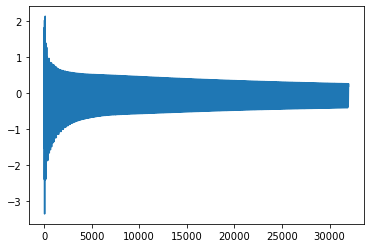

Signal type:  uniform


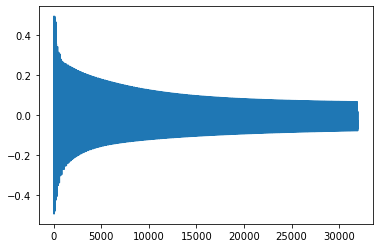

Signal type:  sin


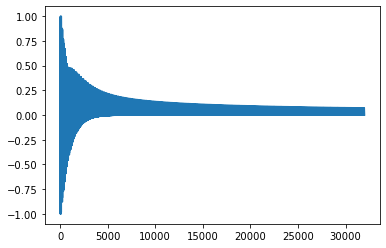

Signal type:  triangular


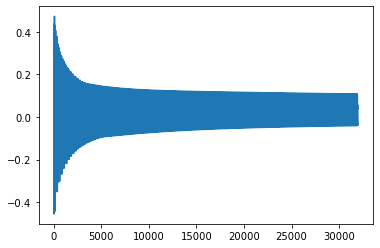

In [18]:
def Guitar(frequency, duration, sample_rate, signaltype, a, b):
    length = int(sample_rate/frequency)
    
    arr = []
    if signaltype == "normal":
        arr = np.random.normal(0, 1, length)
    elif signaltype == "uniform":
        arr = np.random.uniform(-0.5, 0.5, length)
    elif signaltype == "sin":
        arr = np.sin(range(length))
    elif signaltype == "triangular":
        arr = np.random.triangular(-0.5, 0, 0.5, length)
        
    samples = np.append(arr, np.zeros(int(sample_rate * duration) - len(arr)))
  
    for i in range(len(arr), len(samples)):
        samples[i] = (samples[i - len(arr)] * a + samples[i - len(arr) - 1] * b)
 
    return samples

for t in ["normal", "uniform", "sin", "triangular"]:
    print("Signal type: ", t)
    string = Guitar(freq, duration, rate, t, 0.5, 0.5)
    display.display(display.Audio(string, rate=rate))
    plt.plot(string)
    plt.show()

#### Реализация трезвучий

In [22]:
notes = [[6, 10, 13], [2, 5, 9]]

def Notes(notes, frequency, duration, sample_rate, seqtype, a, b):
    x = []
    for trio in notes:
        for note in trio:
            fk = frequency * (np.power(2, note / 12.0))
            x = np.append(x,Guitar(fk, duration, sample_rate, seqtype, a, b))
    return x

res = Notes(notes, freq, duration, rate, "normal", 0.5, 0.5)
display.display(display.Audio(res, rate=rate))

### Эксперименты с модификациями алгоритма Карплуса-Стронга

#### Алгоритм с вводом коэффициента потерь $\rho$

In [23]:
for coef_rho in [0.8, 0.9, 0.94, 0.97, 0.98, 1]:
    print("rho: ", coef_rho)
    res = Notes(notes, freq, duration, rate, "normal", coef_rho / 2, coef_rho / 2)
    display.display(display.Audio(res, rate=rate))

rho:  0.8


rho:  0.9


rho:  0.94


rho:  0.97


rho:  0.98


rho:  1


При $\rho=0.8$ звучание струн затухает слишком быстро. При $\rho=0.9$ уже слышна некоторая продолжительность. От 0.94 и далее продолжительность звучания стремительно растет.

#### Алгоритм с увеличением времени затухания

In [24]:
for alpha in [0.2, 0.5, 0.7, 0.9, 0.94, 0.97, 0.98]:
    print("alpha: ", alpha)
    res = Notes(notes, freq, duration, rate, "normal", 1 - alpha, alpha)
    display.display(display.Audio(res, rate=rate))

alpha:  0.2


alpha:  0.5


alpha:  0.7


alpha:  0.9


alpha:  0.94


alpha:  0.97


alpha:  0.98
